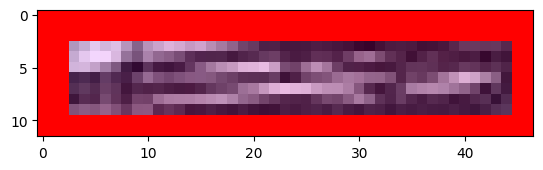

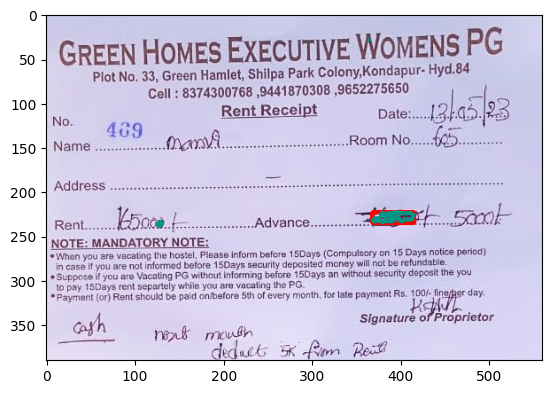

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
frames = cv2.imread("./test4.jpg")
stretch = frames.copy() #Frame is the imported image
#Increasing the contrast of the image
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8,8))
lab = cv2.cvtColor(stretch, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BG


# convert to gray
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# blur
smooth = cv2.GaussianBlur(gray, (11,11), 0)

img2 = cv2.cvtColor(smooth,cv2.COLOR_GRAY2BGR)

frame_HSV = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
frame_threshold = cv2.inRange(frame_HSV, (0, 0, 10), (180, 255, 80))
contours,hierarchy, = cv2.findContours(frame_threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)
#cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour
largestContourArea = sorted_areas[-1]*0.1
largestContour = 0
for cnt in contours:
    contourArea = cv2.contourArea(cnt)
    if( contourArea > largestContourArea):
        #cv2.drawContours(frames, cnt, -1, (255,0,132), thickness=4) 
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(frames, (x, y), (x+w, y+h), (255,0,0), 4)
        
        ROI = frames[y:y+h,x:x+w]     
        plt.imshow(ROI)
        plt.show()
cv2.drawContours(frames, contours, -1, (0,150,132), thickness=4) 
plt.imshow(frames)
plt.show()